In [1]:
import pandas as pd

def aggregate_monthly_data(data):
    # Load the CSV file
    #file_path = f'{spreadsheet_name}'
    #data = pd.read_csv(file_path)

    # Convert the 'timestamp' column to datetime
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Set the timestamp as the index
    data.set_index('timestamp', inplace=True)

    # Aggregate the energy consumption data monthly
    monthly_energy_aggregates = data.filter(like='out.').resample('M').sum()

    # Aggregate non-changing columns by taking the first available value for each month
    non_changing_columns = data[['upgrade', 'in.state', 'in.comstock_building_type', 'models_used', 'floor_area_represented']].resample('M').first()

    # Combine the aggregated data
    monthly_aggregated_data = pd.concat([non_changing_columns, monthly_energy_aggregates], axis=1)

    # Reset index to make the timestamp a column again
    monthly_aggregated_data.reset_index(inplace=True)

    return monthly_aggregated_data



In [2]:
# Example usage
#baseline_data = 'up00-1a-smalloffice.csv'
#baseline_monthly_df = aggregate_monthly_data(baseline_data)

#LED_data = 'up05-1a-smalloffice.csv'
#LED_monthly_df = aggregate_monthly_data(LED_data)
#baseline_monthly_df['out.electricity.total.energy_consumption.kwh']
#LED_monthly_df['out.electricity.total.energy_consumption.kwh']

In [3]:
#baseline_monthly_df['out.electricity.total.energy_consumption.kwh'] - LED_monthly_df['out.electricity.total.energy_consumption.kwh']
#LED_monthly_df['out.electricity.total.energy_consumption.kwh.savings']

In [4]:
state_abv = {
    '2': 'AK',
    '1': 'AL',
    '5': 'AR',
    '4': 'AZ',
    '6': 'CA',
    '8': 'CO',
    '9': 'CT',
    '11': 'DC',
    '10': 'DE',
    '12': 'FL',
    '13': 'GA',
    '15': 'HI',
    '19': 'IA',
    '16': 'ID',
    '17': 'IL',
    '18': 'IN',
    '20': 'KS',
    '21': 'KY',
    '22': 'LA',
    '25': 'MA',
    '24': 'MD',
    '23': 'ME',
    '26': 'MI',
    '27': 'MN',
    '29': 'MO',
    '28': 'MS',
    '30': 'MT',
    '37': 'NC',
    '38': 'ND',
    '31': 'NE',
    '33': 'NH',
    '34': 'NJ',
    '35': 'NM',
    '32': 'NV',
    '36': 'NY',
    '39': 'OH',
    '40': 'OK',
    '41': 'OR',
    '42': 'PA',
    '44': 'RI',
    '45': 'SC',
    '46': 'SD',
    '47': 'TN',
    '48': 'TX',
    '49': 'UT',
    '51': 'VA',
    '50': 'VT',
    '53': 'WA',
    '55': 'WI',
    '54': 'WV',
    '56': 'WY'}

In [5]:
test_state_abv = {
    '2': 'AK',
    '1': 'AL',
    '5': 'AR',
    '4': 'AZ'}

In [6]:
import requests
from io import StringIO

In [7]:
base_url = "https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2023/comstock_amy2018_release_1/timeseries_aggregates/by_state/upgrade=5/state={STATE}/up05-{state}-smalloffice.csv"


In [8]:
# Load the CSV file into a DataFrame
savings_df = pd.read_csv('savings.csv')


In [9]:
# Loop through each state abbreviation
for state in state_abv.values():
    # Construct the URL for the current state
    url = base_url.format(STATE=state.upper(), state=state.lower())
    
    try:
        # Make a GET request to fetch the CSV content
        response = requests.get(url)
        if response.status_code == 200:
            print(f"downloading state: {state}")
            # Convert the CSV content to a DataFrame
            csv_content = StringIO(response.content.decode('utf-8'))
            df = pd.read_csv(csv_content)
            
            monthly_df = aggregate_monthly_data(df)
            monthly_sum = monthly_df['out.electricity.total.energy_consumption.kwh.savings'].sum()
            print(f"state: {state}, monthly_sum: {monthly_sum}")
            savings_df.loc[savings_df['state'] == state, 'LED savings'] = monthly_sum
            # Append the DataFrame to the combined DataFrame
            #combined_df = pd.concat([combined_df, df], ignore_index=True)
        else:
            print(f"Failed to download data for {state.upper()}: HTTP {response.status_code}")
    except Exception as e:
        print(f"Error downloading data for {state.upper()}: {e}")


downloading state: AK
state: AK, monthly_sum: 3488180.542868677
downloading state: AL
state: AL, monthly_sum: 66680550.0703267
downloading state: AR
state: AR, monthly_sum: 37542370.62836001
downloading state: AZ
state: AZ, monthly_sum: 72409500.64730935
downloading state: CA
state: CA, monthly_sum: 62347580.462308556
downloading state: CO
state: CO, monthly_sum: 51627878.38481238
downloading state: CT
state: CT, monthly_sum: 38357109.691742994
downloading state: DC
state: DC, monthly_sum: 5053999.471376376
downloading state: DE
state: DE, monthly_sum: 10600918.53785326
downloading state: FL
state: FL, monthly_sum: 280079325.01888186
downloading state: GA
state: GA, monthly_sum: 110090761.22319667
downloading state: HI
state: HI, monthly_sum: 12984046.95083282
downloading state: IA
state: IA, monthly_sum: 17819771.115522083
downloading state: ID
state: ID, monthly_sum: 24949786.901584372
downloading state: IL
state: IL, monthly_sum: 85750340.38287719
downloading state: IN
state: IN, mo

In [10]:
#base_url = "https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=nrel-pds-building-stock%2Fend-use-load-profiles-for-us-building-stock%2F2023%2Fcomstock_amy2018_release_1%2Ftimeseries_aggregates%2Fby_state%2Fupgrade%3D5%2Fstate%3D{STATE}%2F"

# Loop over the state_abv dictionary
#for code, abv in state_abv.items():
#    # Replace {STATE} in the base_url with each state abbreviation
#    url_with_state = base_url.replace("{STATE}", abv)
#    print(url_with_state)

In [11]:
#https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6
import os
import geopandas as gpd

gdf = gpd.read_file(os.getcwd()+'/cb_2018_us_state_500k')
#gdf.head()

In [12]:
gdf = gdf.merge(savings_df,left_on='STUSPS',right_on='state')
#gdf.head()

In [13]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [14]:
# Create a "copy" of gdf for re-projecting
#visframe = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
#fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
#ax.axis('off')

# create map of all states except AK and HI in the main map axis
#visframe[~visframe.state.isin(['HI','AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


In [15]:
# Apply this to the gdf to ensure all states are assigned colors by the same func
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

C:\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


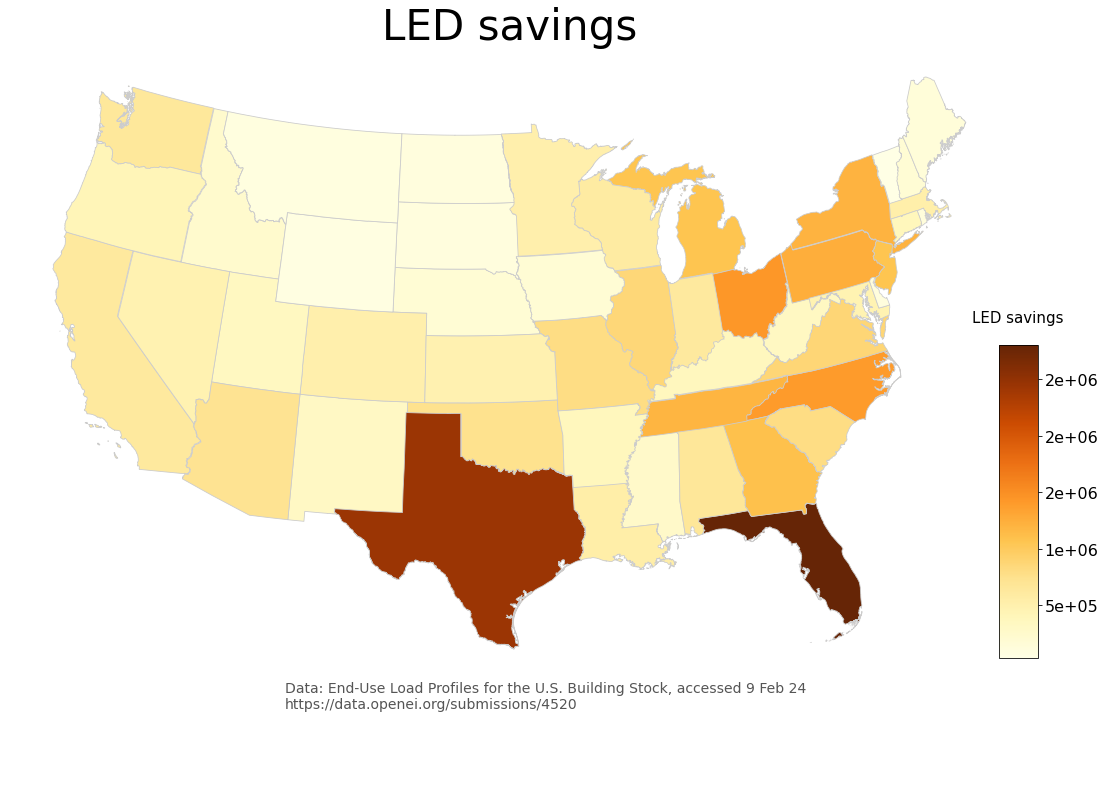

In [16]:
# **************************
# set the value column that will be visualised
variable = 'LED savings'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf['LED savings'].min(), gdf['LED savings'].max() #math.ceil(gdf['LED savings'].max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlOrBr"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf.to_crs({'init':'epsg:2163'})



# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# set the font for the visualization to Helvetica
hfont = {'fontname':'Helvetica'}

# add a title and annotation
ax.set_title('LED savings', **hfont, fontdict={'fontsize': '42', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('LED savings\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0'))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
# annotate the data source, date of access, and hyperlink
ax.annotate("Data: End-Use Load Profiles for the U.S. Building Stock, accessed 9 Feb 24\nhttps://data.openei.org/submissions/4520", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.state not in ['AK','HI']:
        vf = visframe[visframe.state==row.state]
        c = gdf[gdf.state==row.state][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')